# Convolutional Neural Networks

In this section, we will cover:
1. Introduction and Motivation
2. Convolutions 1D and 2D
3. Pooling layers
4. Receptive Fields

## 1. Introduction and Motivation 
Convolutional Neural Networks (CNNs) are a type of neural network designed to work with image data.  
They automatically detect important local features like edges and textures by applying small filters across the image.   
This approach makes them much more efficient and robust than fully connected networks.

## 2. Convolutions 1D

**Convolutions** are fundamental operations in Convolutional Neural Networks (CNNs), where **small filters** (also known as **kernels**) scan over the input data to detect patterns. These filters are shared across the entire input, which reduces the number of parameters significantly compared to fully connected networks.

### 1D Convolution

A **1D convolution** is typically applied to **sequential data** such as time series or audio signals. The filter slides along the sequence, computing the **dot product** between the filter and a segment of the input.

In a 1D convolution with stride, the output at position $i$ is given by the formula:

$$
y[i] = \sum_{j=0}^{k-1} x[i \cdot s + j] \cdot w[j]
$$

Where:
- $x$ is the input sequence.
- $w$ is the filter (kernel) of size $k$.
- $y[i]$ is the output of the convolution at position $i$.
- $s$ is the stride, which determines how many steps the filter moves along the input.

### Example of 1D Convolution:

Let's take a simple time series:

$$
\text{Input} = [3, 2, 1, 2, 3, 4, 5]
$$

And a filter:

$$
\text{Filter} = [1, 0, -1]
$$

At each step, we compute the **dot product** between the input slice and the filter, then move the filter along the sequence by the stride value. For example, the first calculation with stride 1 is:

$$
(3 \times 1) + (2 \times 0) + (1 \times -1) = 3 + 0 - 1 = 2
$$

Repeating this process across the input sequence produces the **output sequence**:

$$
\text{Output} = [2, 0, -2, -2, -2]
$$

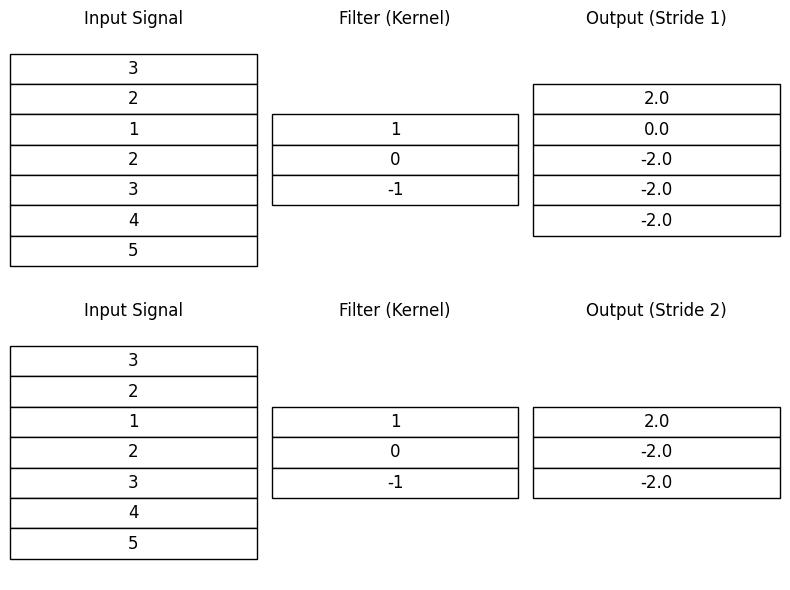

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 1D input signal (7x1)
input_signal = np.array([3, 2, 1, 2, 3, 4, 5])

# Define a 1D filter (3x1)
filter_1d = np.array([1, 0, -1])

# Function to perform 1D convolution with stride
def conv1d(signal, kernel, stride=1):
    kernel_size = len(kernel)
    output_size = (len(signal) - kernel_size) // stride + 1
    output = np.zeros(output_size)
    
    for i in range(0, len(signal) - kernel_size + 1, stride):
        output[i // stride] = np.sum(signal[i:i+kernel_size] * kernel)
    
    return output

# Perform convolution with stride 1 and stride 2
conv_output_stride_1 = conv1d(input_signal, filter_1d, stride=1)
conv_output_stride_2 = conv1d(input_signal, filter_1d, stride=2)

# Modify the plotting function to handle 1D arrays without using the incorrect plotting function for image-like data
def plot_as_matrix(ax, data, title):
    ax.axis('off')  # Remove the axes for a clean look
    table_data = np.array(data).reshape(-1, 1)
    table = ax.table(cellText=table_data, loc='center', cellLoc='center', edges='closed')
    table.scale(1, 1.5)  # Adjust scaling
    table.set_fontsize(12)
    ax.set_title(title)

# Create a new plot with only integers displayed in boxes as a table
fig, axs = plt.subplots(2, 3, figsize=(8, 6))

# Input signal (vector)
plot_as_matrix(axs[0, 0], input_signal, 'Input Signal')

# Filter (kernel)
plot_as_matrix(axs[0, 1], filter_1d, 'Filter (Kernel)')

# Output (Stride 1)
plot_as_matrix(axs[0, 2], conv_output_stride_1, 'Output (Stride 1)')

# Input signal (vector, repeated for stride 2)
plot_as_matrix(axs[1, 0], input_signal, 'Input Signal')

# Filter (kernel, repeated for stride 2)
plot_as_matrix(axs[1, 1], filter_1d, 'Filter (Kernel)')

# Output (Stride 2)
plot_as_matrix(axs[1, 2], conv_output_stride_2, 'Output (Stride 2)')

plt.tight_layout()
plt.show()


## Convolutions 2D

**2D Convolutions** are primarily used with image data. In a 2D convolution, a filter (or kernel) slides over the height and width of the input image, computing the dot product between the filter and the portion of the image it covers. 


### Example of 2D Convolution with a 3x3 Image and a 2x2 Kernel

Let's consider the following **3x3 input image**:

$$
\text{Image} =
\begin{bmatrix}
1 & 2 & 3 \\
0 & 1 & 2 \\
1 & 0 & 1
\end{bmatrix}
$$

And a **2x2 filter** (kernel):

$$
\text{Filter} =
\begin{bmatrix}
1 & 0 \\
-1 & 1
\end{bmatrix}
$$

### Convolution Calculation

The convolution will be performed with a **stride of 1**, meaning the filter moves one step at a time across the image.

### Output

The output feature map after applying the convolution will be:

$$
\text{Output} =
\begin{bmatrix}
2 & 3 \\
-1 & 2
\end{bmatrix}
$$


In [2]:
import numpy as np

def conv2d(image, kernel, stride=1):
    # Get dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculate the dimensions of the output feature map
    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1
    output = np.zeros((output_height, output_width))
    
    # Perform the 2D convolution
    for i in range(0, output_height):
        for j in range(0, output_width):
            # Extract the region of the image
            region = image[i * stride:i * stride + kernel_height, j * stride:j * stride + kernel_width]
            # Compute the convolution (element-wise multiplication and sum)
            output[i, j] = np.sum(region * kernel)
    
    return output

# Test the conv2d function with the provided image and kernel
test_image = np.array([[1, 2, 3],
                       [0, 1, 2],
                       [1, 0, 1]])

test_kernel = np.array([[1, 0],
                        [-1, 1]])

# Perform convolution
output_result = conv2d(test_image, test_kernel, stride=1)
output_result

array([[ 2.,  3.],
       [-1.,  2.]])

## 3. Pooling Layers

Pooling layers reduce the spatial dimensions of feature maps while retaining the most important information.   
This down-sampling helps to lower computational costs and makes the network more robust to small translations in the input image.

- **Max pooling** selects the maximum value from each patch of the input feature map. It preserves the most significant features while reducing the dimensionality.
- **Average pooling** calculates the average value of each patch instead of the maximum. This can smooth the feature map and is less commonly used than max pooling.

### Example of Max Pooling

Let's consider a simple 4x4 input feature map:

$$
\text{Input Feature Map} =
\begin{bmatrix}
1 & 2 & 3 & 0 \\
0 & 1 & 2 & 3 \\
1 & 0 & 1 & 2 \\
0 & 2 & 3 & 0
\end{bmatrix}
$$

Assuming we use a **2x2 max pooling** operation with a stride of 2, we will extract the maximum value from each 2x2 region.

### Output 
The resulting output feature map after applying max pooling is:

$$
\text{Output Feature Map} =
\begin{bmatrix}
2 & 3 \\
2 & 3
\end{bmatrix}
$$

In [3]:
import numpy as np

def max_pooling(input_matrix, pool_size=2, stride=2):
    # Calculate output dimensions
    output_height = (input_matrix.shape[0] - pool_size) // stride + 1
    output_width = (input_matrix.shape[1] - pool_size) // stride + 1
    output = np.zeros((output_height, output_width))
    
    # Perform max pooling
    for i in range(0, output_height):
        for j in range(0, output_width):
            region = input_matrix[i * stride:i * stride + pool_size, j * stride:j * stride + pool_size]
            output[i, j] = np.max(region)
    
    return output

# Test the max_pooling function with the provided feature map
input_feature_map = np.array([[1, 2, 3, 0],
                               [0, 1, 2, 3],
                               [1, 0, 1, 2],
                               [0, 2, 3, 0]])

# Perform max pooling
output_feature_map = max_pooling(input_feature_map, pool_size=2, stride=2)
output_feature_map

array([[2., 3.],
       [2., 3.]])

## 4. Receptive Fields

In CNNs, the **receptive field** refers to the region of the input image that influences a particular neuron in a feature map. 

- In the early layers of a CNN, neurons have **small receptive fields**, meaning they only "see" a small portion of the input image (e.g., 3x3 patches).
- As you move deeper into the network, the receptive fields of the neurons increase in size, allowing them to capture more complex patterns and larger portions of the image.
- This hierarchical structure enables the network to learn a combination of local features (edges, textures) in early layers and more abstract concepts (shapes, objects) in deeper layers.   


![Receptive Fields](imgs/receptive_fields.png)
> Examples of receptive fields from Prince, Understanding deep learning. Section 10.2

## What are CNN looking at? 
By recording the istances of when neurons activate, it is possible to visualize what neurons have learned to look for.

Head to [Convnet Playground](https://convnetplayground.fastforwardlabs.com/#/models) to see an example of activation patterns in popular CNN networks trained on large scale image datasets.

> Credit: https://github.com/fastforwardlabs/convnetplayground 

  

For more information on CNN activations, refer to [Activation Atlas](https://distill.pub/2019/activation-atlas/)

> Credit: Carter, et al., "Activation Atlas", Distill, 2019.